#### 무게를 찾기
- 목표 : 농어(Perch) 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight
- 학습-방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 > 데이터의 분포가 선형의 형태

In [36]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [37]:
data=pd.read_csv('../DATA/fish.csv',usecols=[0,1,2])
fishDF=pd.DataFrame(data)

In [38]:
mask =fishDF.Species.isin(['Perch'])
fishDF1=fishDF[mask]
fishDF1.reset_index(drop=True, inplace=True)
fishDF1.index

RangeIndex(start=0, stop=56, step=1)

In [39]:
features=fishDF1[['Length']]
target=fishDF1['Weight']

print(f'features => {features.shape}, {features.ndim}D')
print(f'target=> {target.shape}, {target.ndim}D')

features => (56, 1), 2D
target=> (56,), 1D


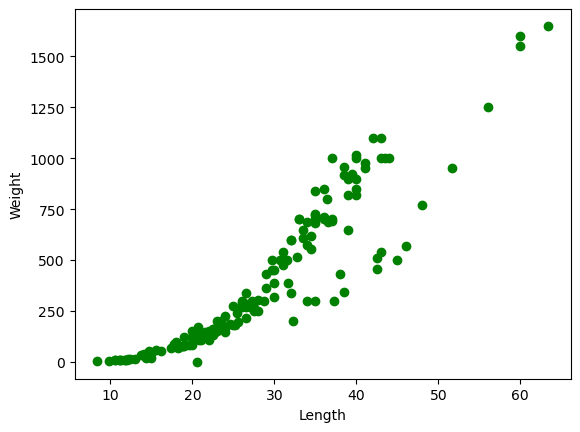

In [40]:
# 현재 데이터의 분포 확인
plt.plot(fishDF['Length'], fishDF['Weight'], 'go')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    random_state=10) # 최적의 k 찾기전 까지는 풀면 안됨

In [42]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [43]:
mmScaler = MinMaxScaler()

In [44]:
mmScaler.fit(X_train)

MinMaxScaler()

In [45]:
# 학습용/테스트용 데이터셋 스케일링 진행
X_train_scaled=mmScaler.transform(X_train)
X_test_scaled=mmScaler.transform(X_test)

In [46]:
X_test_scaled = mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((14, 1), 0.18539325842696627, 0.8595505617977527)

In [47]:
Length=pd.DataFrame({'Length':fishDF['Length']})
Weight=pd.Series(fishDF['Weight'])

In [48]:
# 학습 모델 인스턴스 생성
model=LinearRegression()

In [49]:
model.fit(Length, Weight)

LinearRegression()

In [50]:
# 모델 파라미터 확인
print(f'model.coef_ : {len(model.coef_)} 개, {model.coef_}')
print(f'model.intercept_ : {model.intercept_}')

model.coef_ : 1 개, [30.68637086]
model.intercept_ : -473.64900740680093


In [51]:
# 모듈 로딩 => 손상/비용함수로 오차 계산, 결정계수
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [52]:
# 점수 => 내부에서 predict() 진행 => 결과로 R2 계수 추출해서 반환
score=model.score(Length, Weight)
print(f'score : {score}')

score : 0.8438584812596858


In [53]:
# 성능지표 => 오차계산과 결정계수 계산
pre_weight=model.predict(Length)

# 손실/비용 계산 함수 => 정답과 예측값
mse=mean_squared_error(Weight, pre_weight)
rmse=mean_squared_error(Weight, pre_weight, squared=False)
mae=mean_absolute_error(Weight, pre_weight)

# 얼마나 정답에 가깝게 값을 예측 했느냐를 나타내는 지표 => 정답과 예측값 제공 : 1에 가까울 수록 좋음
r2=r2_score(Weight, pre_weight)

In [54]:
# 손실/비용함수 값은 0에 가까울 수록
# 결정계수 값은 1에 가까울 수록 성능 좋은 모델
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 19883.452891036774
rmse : 141.0086979268895
mae : 108.90793732905227
r2 : 0.8438584812596858


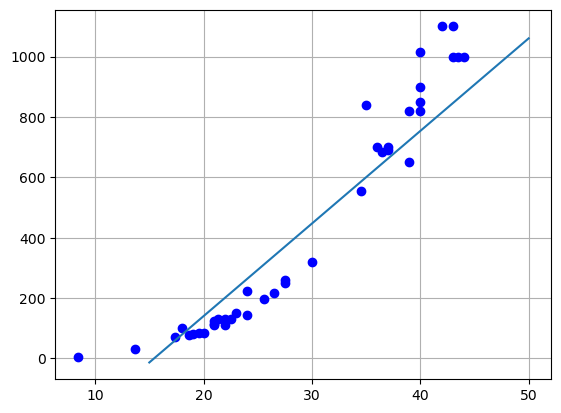

In [59]:
# 시각화
plt.plot(X_train, y_train, 'bo')
plt.plot([15,50],[15*model.coef_+model.intercept_, 50*model.coef_+model.intercept_])
plt.grid()
plt.show()

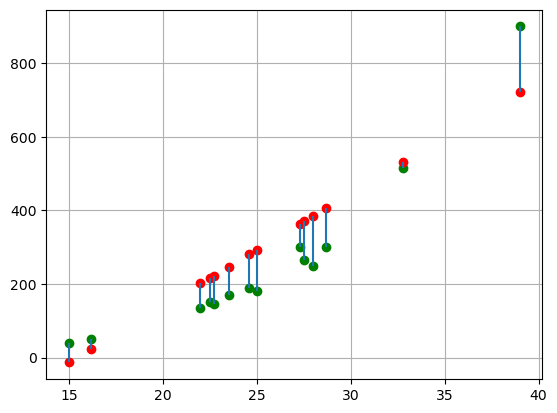

In [58]:
plt.plot(X_test, y_test, 'go')
plt.plot(X_test, model.predict(X_test), 'ro')
plt.vlines(X_test,y_test, model.predict(X_test))
plt.grid()
plt.show()